## Runs XGBoost code from script and it also plots top 15 contributing genes

Training size: 930, Validation size:104
[0]	training-auc:0.87342	validation-auc:0.739437
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 30 rounds.
[1]	training-auc:0.945418	validation-auc:0.823303
[2]	training-auc:0.973472	validation-auc:0.799402
[3]	training-auc:0.980037	validation-auc:0.799616
[4]	training-auc:0.98533	validation-auc:0.794067
[5]	training-auc:0.989345	validation-auc:0.784891
[6]	training-auc:0.990752	validation-auc:0.792574
[7]	training-auc:0.995697	validation-auc:0.787879
[8]	training-auc:0.996071	validation-auc:0.798122
[9]	training-auc:0.99726	validation-auc:0.787879
[10]	training-auc:0.998409	validation-auc:0.795988
[11]	training-auc:0.998783	validation-auc:0.802817
[12]	training-auc:0.999151	validation-auc:0.799402
[13]	training-auc:0.999117	validation-auc:0.804097
[14]	training-auc:0.99927	validation-auc:0.798549
[15]	training-auc:0.999547	validation-auc:0.800256
[16]	

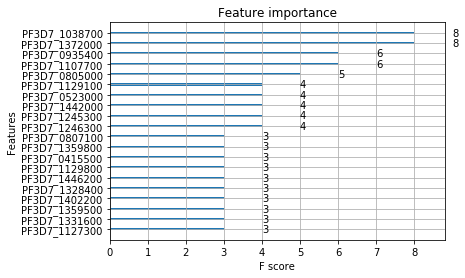

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
train = pd.read_csv("../data/SubCh2_TrainingData.csv")

# Filter out rows with Clearance rate = 'nan'
rows_to_keep = [row for row in range(len(train)) if str(train['ClearanceRate'][row]) != 'nan']
train = train.iloc[rows_to_keep,:].reset_index(drop=True)
gene_names = list(train.columns)[4:4956]

# Encode Clearance Rates as labels
y_raw = list(train['ClearanceRate'])
labelE = LabelEncoder().fit(y_raw)
y = labelE.transform(y_raw)

# Build feature matrix X
X = train.iloc[:,4:4956].values

# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

# Build DMatrixes for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=gene_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=gene_names)

# Declare XGBoost parameters
num_round = 200
param = {
    'booster': 'gbtree',
    'max_depth': 5,
    'eta': 0.1,
    'lambda': 1,
    'alpha': 1,
    'colsample_bytree': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbose': 2
    }

# Prepare XGBoost run
evallist = [(dtrain, 'training'), (dval, 'validation')]

# Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=30)

# Plot top 15 genes contributing to XGBoost
xgb.plot_importance(bst, max_num_features=20)

print("Finished")

In [84]:
feature_gains = bst.get_score(importance_type='gain')
feature_gains_df = pd.DataFrame()
feature_gains_df['Gene'] = list(feature_gains.keys())
feature_gains_df['XGBoostGain'] = list(feature_gains.values())

In [110]:
important_genes = list(feature_gains_df.sort_values(by="XGBoostGain", ascending=False).head(100)['Gene'])

In [134]:
# Save list of important genes
f = open('xgboost_SubCh2_July21st_Top100_genes.txt', 'w')
f.write("\n".join(important_genes)+"\n")
f.close()

In [130]:
new_X = train[important_genes].values
# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(new_X,y,test_size=0.1)
print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

# Build DMatrixes for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=important_genes)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=important_genes)

Training size: 930, Validation size:104


[0]	training-auc:0.871472	validation-auc:0.802976
[1]	training-auc:0.923814	validation-auc:0.818155
[2]	training-auc:0.93522	validation-auc:0.865179
[3]	training-auc:0.953793	validation-auc:0.864583
[4]	training-auc:0.964568	validation-auc:0.874405
[5]	training-auc:0.97352	validation-auc:0.873214
[6]	training-auc:0.977567	validation-auc:0.886905
[7]	training-auc:0.977677	validation-auc:0.89881
[8]	training-auc:0.978891	validation-auc:0.899405
[9]	training-auc:0.981958	validation-auc:0.9
[10]	training-auc:0.983521	validation-auc:0.90119
[11]	training-auc:0.984738	validation-auc:0.895833
[12]	training-auc:0.987381	validation-auc:0.892262
[13]	training-auc:0.988328	validation-auc:0.897619
[14]	training-auc:0.98977	validation-auc:0.899405
[15]	training-auc:0.990068	validation-auc:0.894643
[16]	training-auc:0.991174	validation-auc:0.899405
[17]	training-auc:0.991923	validation-auc:0.903571
[18]	training-auc:0.992644	validation-auc:0.902381
[19]	training-auc:0.993162	validation-auc:0.903571


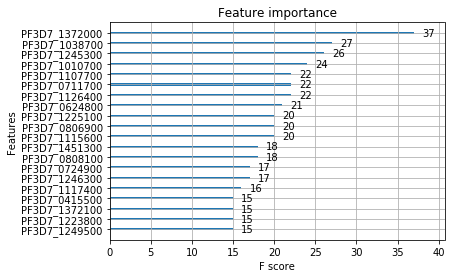

In [131]:
# Declare XGBoost parameters
num_round = 50
param = {
    'booster': 'gbtree',
    'max_depth': 5,
    'eta': 0.1,
    'lambda': 1,
    'alpha': 1,
    'colsample_bytree': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbose': 1
    }

# Prepare XGBoost run
evallist = [(dtrain, 'training'), (dval, 'validation')]

# Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
new_bst = xgb.train(param, dtrain, num_round, evallist)

# Plot top 15 genes contributing to XGBoost
xgb.plot_importance(new_bst, max_num_features=20)

print("Finished")

In [145]:
y_train[0:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [144]:
new_bst.predict(dtrain)[0:50]

array([0.0929867 , 0.18099236, 0.03195775, 0.04635876, 0.05870049,
       0.9027359 , 0.02242251, 0.21903972, 0.05524328, 0.03900386,
       0.7869904 , 0.06108579, 0.19757989, 0.09970681, 0.17906144,
       0.0324567 , 0.86265916, 0.76807994, 0.04222521, 0.02797829,
       0.65961295, 0.3454149 , 0.05235843, 0.899923  , 0.8149364 ,
       0.12776555, 0.03266413, 0.88770384, 0.04777519, 0.8366397 ,
       0.14834619, 0.04201986, 0.09579649, 0.02173538, 0.03288419,
       0.15035129, 0.05910593, 0.02264834, 0.7274121 , 0.04654683,
       0.8282165 , 0.07460906, 0.21669306, 0.09416491, 0.13383718,
       0.03832954, 0.09568746, 0.06078291, 0.08526761, 0.5399396 ],
      dtype=float32)

In [132]:
# Save model
import pickle
with open('xgboost_SubCh2_July21st.pkl', 'wb') as xgboost_model_file:
    pickle.dump(new_bst, xgboost_model_file)

# Make predictions for test set

#### 0 = Fast

#### 1 = Slow

In [2]:
test = pd.read_csv('../data/SubCh2_TestData.csv')
test.head()

,Sample_Names,Country,Asexual_Stage,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,...,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,isolate_02.24HR.DHA.BRep1,Thailand_Myanmar_Border,50,isolate_02,24HR,DHA,BRep1,-0.178971,-1.922426,-1.875015,...,0.790819,-0.070151,0.024133,-2.215227,-1.957654,-2.188635,-1.722201,-3.995680,-0.902979,NaN
1,isolate_02.24HR.DHA.BRep2,Thailand_Myanmar_Border,16,isolate_02,24HR,DHA,BRep2,1.337421,-1.764941,-0.414673,...,0.659458,-1.288305,0.806314,-3.733712,-1.990368,-1.633418,-2.104227,-5.767710,-2.177930,NaN
2,isolate_02.24HR.DHA.BRep3,Thailand_Myanmar_Border,8,isolate_02,24HR,DHA,BRep3,-0.717441,-1.151982,-1.693989,...,0.846346,0.279816,0.115002,-1.305902,-0.679212,-2.099512,-1.626372,-4.422711,-1.408485,NaN
3,isolate_02.24HR.DHA.BRep4,Thailand_Myanmar_Border,6,isolate_02,24HR,DHA,BRep4,0.143501,-1.496923,-1.219010,...,0.927822,0.375290,1.113241,-4.016287,-1.327287,-2.375500,-1.939162,-3.500963,-0.796143,NaN
4,isolate_02.24HR.UT.BRep1,Thailand_Myanmar_Border,48,isolate_02,24HR,UT,BRep1,-0.078235,-1.885653,-1.350747,...,-0.718147,0.193968,-0.125951,0.048244,-1.316566,-2.247523,-1.104079,-4.776909,-2.218115,NaN


## Note: I'm not averaging results across biological replicates, but we should do this in the next round

In [141]:
results = {}
for isolate in list(set(test['Isolate'])):
    tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
    tmp_X = tmp[important_genes].values
    dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
    tmp_y = new_bst.predict(dtmp)
    results[isolate] = tmp_y

In [8]:
test_isolates = list(set(test['Isolate']))
test_isolates.sort()

In [151]:
f = open('../submissions/lylat_SubCh2_xgboost1_2107.txt','w')
f.write("Isolate"+"\t"+"Predicted_Categorical_Clearance\n")
for isolate in test_isolates:
    f.write(isolate+"\t")
    predicted = max(results[isolate])
    if predicted < 0.5:
        f.write("Fast\n")
    else:
        f.write("Slow\n")
f.close()

# Make predictions from scratch

In [3]:
f = open('xgboost_SubCh2_July21st_Top100_genes.txt', 'r')
important_genes = f.read().splitlines()
f.close()

import pickle
f = open('xgboost_SubCh2_July21st.pkl', 'rb')
new_bst = pickle.load(f)
f.close()

In [4]:
results = {}
for isolate in list(set(test['Isolate'])):
    tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
    tmp_X = tmp[important_genes].values
    dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
    tmp_y = new_bst.predict(dtmp)
    results[isolate] = tmp_y

In [10]:
f = open('../submissions/lylat_SubCh2_model1_210719.txt','w')
f.write("Isolate\tPredicted_Categorical_Clearance\tProbability\n")
for isolate in test_isolates:
    f.write(isolate+"\t")
    predicted = max(results[isolate])
    if predicted < 0.5:
        f.write("FAST\t")
        f.write(str(1-predicted) + "\n")
    else:
        f.write("SLOW\t")
        f.write(str(predicted) + "\n")
f.close()